# Integrate-and-Fire (single neuron)

Euler method for current estimate $\hat{x}$:
<br>
$\hat{x}(t_{n}) = \hat{x}(t_{n - 1}) + \Delta t \frac{d\hat{x}}{dt} (t_{n -1})$
<br>
$\frac{d\hat{x}}{dt}(t_{n -1}) = - \hat{x}(t_{n - 1}) + \Gamma o(t_{n - 1})$

Install required packages:

In [ ]:
import numpy as np
import pylab as pl

Initialize parameters:

In [288]:
# timesteps
dt = 0.001 
iterations = 500
x = np.arange(0, iterations) * dt

# mebrane resistance
R = 1 

# membrane time constant
tau_m = 0.04

# external input (mA)
I = 20

# starting potential (mV)
V0 = 0 

# resting potential (mV)
V_rest = -70

# reset
reset = -80

# threshold
T = -63

# constants
delta = 0.1
gamma = 1

# array containing voltages 
voltages = np.zeros(iterations)

# array containing spike times
spikeTime = np.ones(iterations) * -100

# array containing current
currentTime = np.ones(iterations) * I

# array containing current estimate
xhatTime = np.zeros(iterations)

# array containing spike times
spikeTrain = np.zeros(iterations)

Function for computing $o(t) = \Sigma_{i} \delta(t - t_{i})$:

In [289]:
def deltafunction(iteration):
    
    sum = 0
    
    for i in range(iteration):
        
        if spikeTime[i] != -100:
            
            O_sub = delta * (iteration - dt - i)
            
            sum += O_sub
            
    return sum

Run simulation:

In [290]:
for i in range(1, iterations):
    
    # update o(t)
    spikeTrain_cur = deltafunction(i)
    spikeTrain[i] = spikeTrain_cur
    
    # update current estimate
    dIdt = - xhatTime[i - 1] + gamma * spikeTrain[i]
    xhatTime[i] = xhatTime[i - 1] + dt * dIdt
    
    # update voltage
    dVdt = (-(voltages[i - 1] - V_rest) + R * I) / tau_m
    voltages[i] = voltages[i - 1] + dt * dVdt

    if voltages[i] > T:
        
        # update voltage 
        voltages[i] = reset
        spikeTime[i] = -90


Plot results:

Text(0,0.5,'current (in mA)')

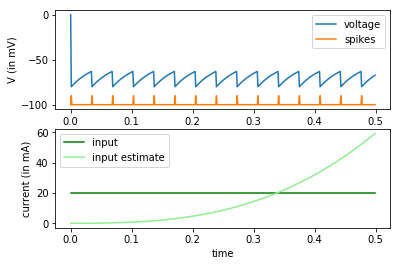

In [291]:
# plot voltage and spike times
pl.subplot(2, 1, 1)
pl.plot(x, voltages,label='voltage')
pl.plot(x, spikeTime,label='spikes')
pl.legend()
pl.ylabel('V (in mV)')

# plot input and input estimate
pl.subplot(2, 1, 2)
pl.plot(x, currentTime, color='green',label='input')
pl.plot(x, xhatTime, color='lightgreen',label='input estimate')
pl.legend()
pl.xlabel('time')
pl.ylabel('current (in mA)')